# GRIP @ The Sparks Foundation

# Author : Shaik Imranuddin

## Task 1 : Object Detection

In this task, I have implemented an object detector which identifies the classes of the objects in an image or video.

## Technical Stack  : OpenCV, Matplotlib

In [1]:
import cv2
import matplotlib.pyplot as plt

## 1 - Loading the Tensorflow pre-trained model

In [2]:
# Loading the files
confg_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frzn_mdl = 'frozen_inference_graph.pb'

# Load the Deep Neural Network Detection Model
model = cv2.dnn_DetectionModel(frzn_mdl, confg_file)

## 2 - Loading the coco names

In [3]:
classNames=[]

# Loading the file with class labels
classFile ='coco.txt'

# Adding the class names from file into the above list
with open(classFile,'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

In [4]:
print(classNames)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'horse', 'dog', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


## 3 - Reading an image

In [5]:
img = cv2.imread('Images/Test1.jpg')

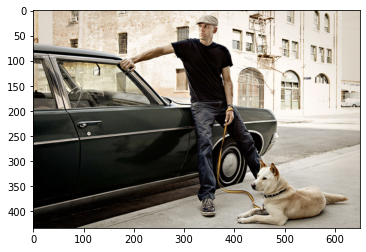

In [6]:
# Displaying the image in RGB format

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 4 - Setting up the model in accordance to configuration files

In [7]:
# In the configuration file input size is defined to be 320 by 320.
model.setInputSize(320, 320)

# 255 is the gray level for white.
model.setInputScale(1.0/127.5)

# Mobilenet takes input from [-1, 1], this is why we have put the mean to be 127.5
model.setInputMean((127.5, 127.5, 127.5))

# As opencv by default uses BGR, we wan to swap R and B for all images.
model.setInputSwapRB(True)

<dnn_Model 0x7f8a2e96f2b0>

## 5 - Detecting the objects in an image

In [8]:
classId, conf, bbox = model.detect(img, confThreshold = 0.6)

In [9]:
print(classId, "\n\n" , conf, "\n\n" , bbox)

[[ 1]
 [18]
 [ 3]] 

 [[0.7874121 ]
 [0.7591231 ]
 [0.64480615]] 

 [[179   5 243 411]
 [406 304 212 119]
 [ 11  53 521 367]]


### ADDING BOUNDING BOXES TO OBJECTS OF THE IMAGE

In [10]:
i = 0
color = [(0,255,0),(255,0,0),(0,0,255),(255,255,0),(0,255,255),(255,0,255)]
if len(classId)!=0 :
    for class_Index, confidence, box in zip(classId.flatten(), conf.flatten(), bbox):
        cv2.rectangle(img, box, color[i%6], thickness = 5)
        cv2.putText(img, classNames[class_Index-1].upper(), (box[0]+10,box[1]+40), cv2.FONT_HERSHEY_PLAIN, fontScale=2, color = color[i%6], thickness=5)
        i += 1

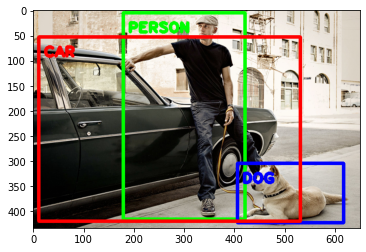

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 6 - Detecting the objects in a video

In [12]:
# Loading the video
# For webcam use cv2.VideoCapture(1)

video = cv2.VideoCapture("traffic-micro.mp4")

### ADDING BOUNDING BOXES TO OBJECTS IN THE VIDEO

In [13]:
while True:
    ret, frame = video.read()
    
    classId, conf, bbox = model.detect(frame, confThreshold = 0.6)

    i = 0
    if (len(classId)!=0):
        print(classId)
        for class_Index, confidence, box in zip(classId.flatten(), conf.flatten(), bbox):
            if class_Index <= 80 :
                cv2.rectangle(frame, box, color[i%6], thickness = 5)
                cv2.putText(frame, classNames[class_Index-1].upper(), (box[0]+10,box[1]+40), cv2.FONT_HERSHEY_PLAIN, fontScale=2, color = color[i%6], thickness=5)
                i += 1
            
    cv2.imshow('Object Detection Video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
video.release()
cv2.destroyAllWindows()

[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]
 [1]]
[[6]
 [6]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [1]
 [3]
 [4]]
[[6]
 [6]
 [6]
 [1]
 [3]
 [4]]
[[6]
 [6]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [1]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]
 [6]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]]
[[6]
 [6]]
[[6]
 [6]]
[[6]
 [6]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]
 [6]
 [3]]
[[6]
 [6]]
[[6]
 [6]
 [3]]
[[6]
 [6]
 [3]]
[[6]
 [6]
 [3]]
[[6]
 [6]]
[[6]
 [6]]
[[6]
 [6]
 [1]]
[[6]
 [6]
 [3]
 [1]
 [1]]
[[6]
 [6]
 [1]
 [3]
 [1]]
[[6]
 [6]
 [1]
 [3]
 [1]]
[[6]
 [6]
 [1]]
[[6]
 [6]
 [1]
 [1]
 [3]]
[[6]
 [6]
 [1]
 [1]]
[[6]
 [6]
 [1]
 [1]
 [3]]
[[6]
 [6]
 [1]]
[[6]
 [6]
 [1]
 [1]]
[[6]
 [6]
 [1]
 [1]]
[[6]
 [6]
 [1]
 [1]]
[[6]
 [6]
 [1]
 [1]]
[[6]

error: OpenCV(4.5.2) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-iwig8vc6/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


# Conclusion

### I was  able to successfully able to implement an object detector which identifies the classes of the objects in an image or video.

# Thank You